In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage

In [2]:
def load_image_files(container_path, dimension=(104, 104)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "A Rice Disease detection using SVM"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)


In [3]:
image_dataset = load_image_files("D:/rice/rice_leaf_diseases/") #Load here dataset
print(image_dataset.target_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [4]:
print(image_dataset.target_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [6]:
y_pred = clf.predict(X_test)


In [7]:
print(clf.score(X_test,y_test))

0.8055555555555556


In [8]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.70      0.88      0.78         8
           2       0.86      0.75      0.80        16

    accuracy                           0.81        36
   macro avg       0.80      0.82      0.80        36
weighted avg       0.81      0.81      0.81        36




In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10  1  1]
 [ 0  7  1]
 [ 2  2 12]]


In [11]:
print(y_pred)

[2 0 2 2 2 0 0 2 1 2 0 2 1 1 2 0 0 2 0 2 1 1 0 0 0 0 2 2 1 1 1 1 1 2 2 0]


In [14]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flat_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flat_data.append(img_resized.flatten()) 
    return image,flat_data

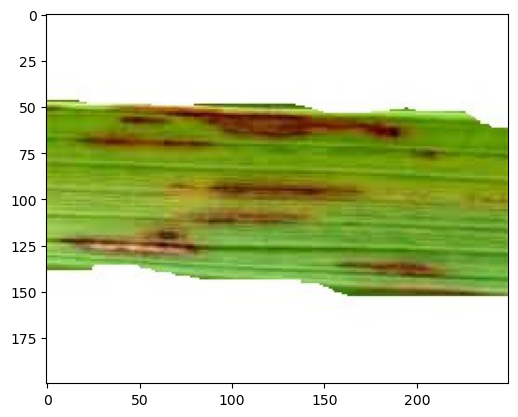

Predicted Disease is Leaf smut


In [15]:
plot , img = load_image(r'D:/rice/rice_leaf_diseases/Leaf smut/DSC_0504.jpg')
%matplotlib inline
plt.imshow(plot)
plt.show()
k = image_dataset.target_names
p = clf.predict(img)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])

In [16]:
import pickle
# now you can save it to a file
with open(r'D:/rice/rice_pred.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [17]:
with open(r'D:/rice/rice_pred.pkl', 'rb') as f:
    clf1 = pickle.load(f)

In [18]:
cy = clf1.predict(img)
print(cy)

[2]


In [19]:
import sklearn
print(sklearn.__version__)

1.0.2


In [21]:
from PIL import ImageTk
import PIL.Image
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from skimage.io import imread
from skimage.transform import resize
import skimage,pickle

windo = Tk()
windo.configure(background='white')
windo.title("Rice Disease Prediction App")
# width  = windo.winfo_screenwidth()
# height = windo.winfo_screenheight()
# windo.geometry(f'{width}x{height}')
windo.geometry('1120x820')
windo.iconbitmap('D:/rice/rice.ico')
windo.resizable(0,0)

#Size for displaying Image
w = 650;h = 270
size = (w, h)

def upload_im():
    try:
        global im,resized,cp,path,display,imageFrame,dn1
        imageFrame = tk.Frame(windo)
        imageFrame.place(x=415, y=160)
        path = filedialog.askopenfilename()
        im = PIL.Image.open(path)
        resized = im.resize(size, PIL.Image.ANTIALIAS)
        tkimage = ImageTk.PhotoImage(resized)
        display = tk.Label(imageFrame)
        display.imgtk = tkimage
        display.configure(image=tkimage)
        display.grid()
        dn1 = tk.Label(windo, text='Original\ud83d\ude80 Image ', width=20, height=1, fg="white", bg="brown4",
                       font=('times', 22, ' bold '))
        dn1.place(x=570, y=120)
        cp = tk.Button(windo, text='Predict\ud83d\ude80 Disease', bg="brown4", fg="white", width=20,
                       height=1, font=('times', 22, 'italic bold '),command = prediction,activebackground = 'yellow')
        cp.place(x=570, y=440)
    except Exception as e:
        print(e)
        noti = tk.Label(windo, text = 'Please upload an Image\ud83d\ude80 File', width=33, height=2, fg="white", bg="brown4",
                            font=('times', 23, ' bold '))
        noti.place(x=454, y=540)
        windo.after(5000, destroy_widget, noti)

def destroy_widget(widget):
    widget.destroy()

def prediction():
    windo.after(2000, destroy_widget, cp)
    def load_image(im_file):
        dimension = (104, 104)
        flat_data = []
        img = skimage.io.imread(im_file)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        flat_data.append(img_resized.flatten())
        return flat_data
    img = load_image(path)
    try:
        with open('D:/rice/rice_pred.pkl', 'rb') as f:
            clf = pickle.load(f)
            pred = clf.predict(img)
    except:
        noti = tk.Label(windo, text = 'Model not Found', width=33, height=2, fg="white", bg="brown4",
                            font=('times', 23, ' bold '))
        noti.place(x=454, y=580)
        windo.after(5000, destroy_widget, noti)
    labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    s = [str(i) for i in pred]
    a = int("".join(s))
    lab = str("Predicted Disease is "+ labels[a])
    pred = tk.Label(windo, text=lab, width=33, height=2, fg="white",
                    bg="dark green",
                    font=('times', 23, ' bold '))
    pred.place(x=454, y=540)
    windo.after(7000, destroy_widget, pred)
    windo.after(7000, destroy_widget, display)
    windo.after(7000, destroy_widget, imageFrame)
    windo.after(7000, destroy_widget, dn1)

ri = PIL.Image.open('D:/rice/rice.png')
ri =ri.resize((351,263), PIL.Image.ANTIALIAS)
sad_img = ImageTk.PhotoImage(ri)
panel4 = Label(windo, image=sad_img,bg = 'white')
panel4.pack()
panel4.place(x=20, y=170)

up = tk.Button(windo,text = 'Upload\ud83d\ude80 Image',bg="brown4", fg="white", width=20,
                   height=1, font=('times', 22, 'italic bold '),command = upload_im, activebackground = 'yellow')
up.place(x=20, y=440)

pred = tk.Label(windo, text="Rice Disease Prediction", width=30, height=2, fg="white",bg="dark green",
                font=('times', 25, ' bold '))
pred.place(x=254, y=20)

windo.mainloop()

C:\Users\CS\AppData\Local\Temp\ipykernel_9720\1722218800.py:86: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ri =ri.resize((351,263), PIL.Image.ANTIALIAS)
C:\Users\CS\AppData\Local\Temp\ipykernel_9720\1722218800.py:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized = im.resize(size, PIL.Image.ANTIALIAS)
